# 12. 의사결정나무 과제 


## boston데이터를 가지고 집값을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [1]:
import pandas as pd 
from sklearn.datasets import load_boston
boston= load_boston()
X = pd.DataFrame(boston.data,columns=boston.feature_names)
y = boston.target

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2022)

In [8]:
# 매개변수 없이 진행
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

print(dt_reg.score(X_train, y_train))
print(dt_reg.score(X_test, y_test)) # train 점수와 많이 차이난다.

1.0
0.7267239810676549


In [9]:
dt_reg.get_depth()

20

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1,40,1), 'min_samples_split':range(2,40,1)}

model_grid_tree = GridSearchCV(DecisionTreeRegressor(), param_grid)

In [41]:
model_grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 40),
                         'min_samples_split': range(2, 40)})

In [43]:
model_grid_tree.best_estimator_

DecisionTreeRegressor(max_depth=17, min_samples_split=20)

In [44]:
model_grid_tree.score(X_train, y_train)

0.9503343784769912

In [45]:
model_grid_tree.score(X_test, y_test)

0.7626008288882238

In [46]:
y_pred = model_grid_tree.predict(X_test)
resid = y_test - y_pred
import numpy as np
sse = np.sum(resid**2)
MSE = sse/len(y_test)
RMSE = np.sqrt(MSE)
RMSE

4.509577794274796

In [55]:
# 매개변수 없이 의사결정나무 모델을 생성했을 때, 72%의 설명력이며. train 모델과 설명력과 차이가 있다.
# GridSearchCV를 사용하여, 최적의 매개변수를 찾아 의사결정나무 모델 재생성 했다.
# 재생성된 모델은 76% 설명력으로 올라갔으나, 설명력 자체가 높지는 않다.
# 또한 RMSE값이 4.50이므로 집값의 평균적인 차이는 4.50만큼 난다고 할 수 있다.

## titanic데이터를 가지고 생존율을 예측하는 의사결정나무 모델을 만들고 결과를 해석하세요 

In [94]:
df_t = pd.read_csv("data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [95]:
df_t = df_t.drop(['embark_town','class','adult_male'], axis = 1)

In [96]:
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [97]:
# 전처리
# 결측치 처리
df_t['age'].fillna(df_t['age'].mean(), inplace = True)
df_t['embarked'].fillna(df_t['embarked'].value_counts().index[0], inplace = True)

In [98]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [99]:
df_t = pd.get_dummies(df_t, columns = ['sex', 'embarked'])

In [100]:
df_t

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [101]:
X = df_t.drop(['survived'], axis = 1)
y = df_t['survived']

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2022)

In [103]:
len(X)

891

In [104]:
len(y)

891

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_train, y_train))
print(dt_clf.score(X_test, y_test))

0.9919743178170144
0.7686567164179104


In [110]:
dt_prediction = dt_clf.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, precision_score, recall_score, f1_score
confusion_matrix(y_test, dt_prediction)

array([[139,  29],
       [ 33,  67]])

In [120]:
print(precision_score(y_test, dt_prediction))
print(recall_score(y_test, dt_prediction))
print(f1_score(y_test, dt_prediction))

0.6979166666666666
0.67
0.6836734693877551


In [121]:
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       168
           1       0.70      0.67      0.68       100

    accuracy                           0.77       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



In [122]:
# 0을 잘 맞추고 있으나, 1을 잘 맞추지는 못하는 걸로 보인다. 이를 확인하기 위해 roc커브를 그린다.

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


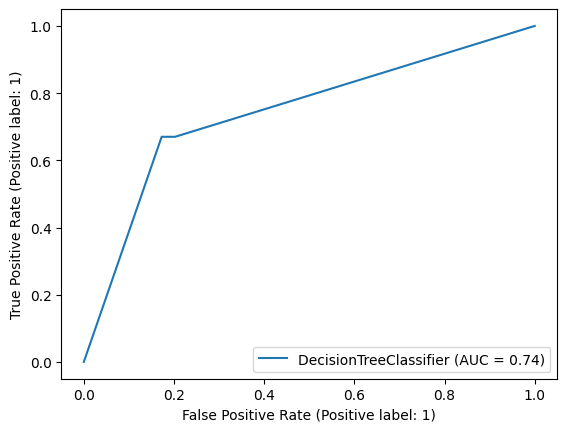

In [123]:
plot_roc_curve(dt_clf, X_test, y_test)

In [125]:
# ROC_AUC_SCORE
roc_auc_score(y_test, dt_clf.predict_proba(X_test)[:,-1])

0.7437797619047619

In [ ]:
# ROC_AUC_SCORE가 74%인 낮은 모델이다. 매개변수를 조정해보자

In [126]:
dt_clf.get_depth()

18

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : range(2,18,1), 'min_samples_leaf' : range(1,18,1)}
model_grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [128]:
model_grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 18),
                         'min_samples_leaf': range(1, 18)})

In [129]:
model_grid_tree.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=6)

In [130]:
model_grid_tree.best_score_ # 의사결정나무 score가 83%으로 향상되었다.

0.8315870967741935

In [131]:
y_pred = model_grid_tree.predict(X_test)

In [133]:
confusion_matrix(y_test, y_pred)

array([[156,  12],
       [ 30,  70]])

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


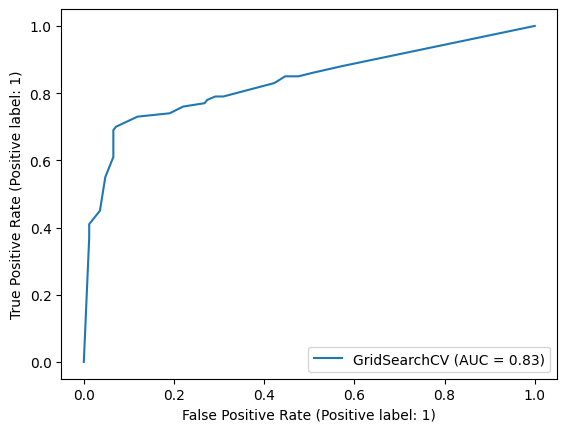

In [138]:
plot_roc_curve(model_grid_tree, X_test, y_test)

In [135]:
y_pred = model_grid_tree.predict(X_test)
resid = y_test - y_pred
import numpy as np
sse = np.sum(resid**2)
MSE = sse/len(y_test)
RMSE = np.sqrt(MSE)
RMSE

0.39587424507089086

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       168
           1       0.85      0.70      0.77       100

    accuracy                           0.84       268
   macro avg       0.85      0.81      0.83       268
weighted avg       0.84      0.84      0.84       268



In [140]:
# ROC_AUC 스코어 역시 74% > 83%으로 증가되었다.
# 과적합을 막고, 최적의 분류 모델을 찾기 위해 GridSearchCV를 사용하였다.
# max_depth = 10, min_samples_leaf = 6으로 모델을 학습시켰다.
# 결과 ROC_AUC_SCORE는 0.83으로 준수하다고 할 수 있다.